In [1]:
###############################################
### a quick start with pyshtools https://shtools.github.io/SHTOOLS/python-examples.html
###############################################

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pyshtools as pysh

In [2]:
print(np.__version__)

1.23.5


In [3]:
pysh.utils.figstyle(rel_width=0.75)
%config InlineBackend.figure_format = 'retina'  # if you are not using a retina display, comment this line!

In [4]:
####

In [5]:
degrees = np.arange(101, dtype=float)
degrees[0] = np.inf
power = degrees**(-2)

In [6]:
clm = pysh.SHCoeffs.from_random(power, seed=12345)

In [8]:
clm

  name = None
  kind = 'real'
  normalization = '4pi'
  csphase = 1
  lmax = 100
  error_kind = None
  header = None
  header2 = None
  units = None

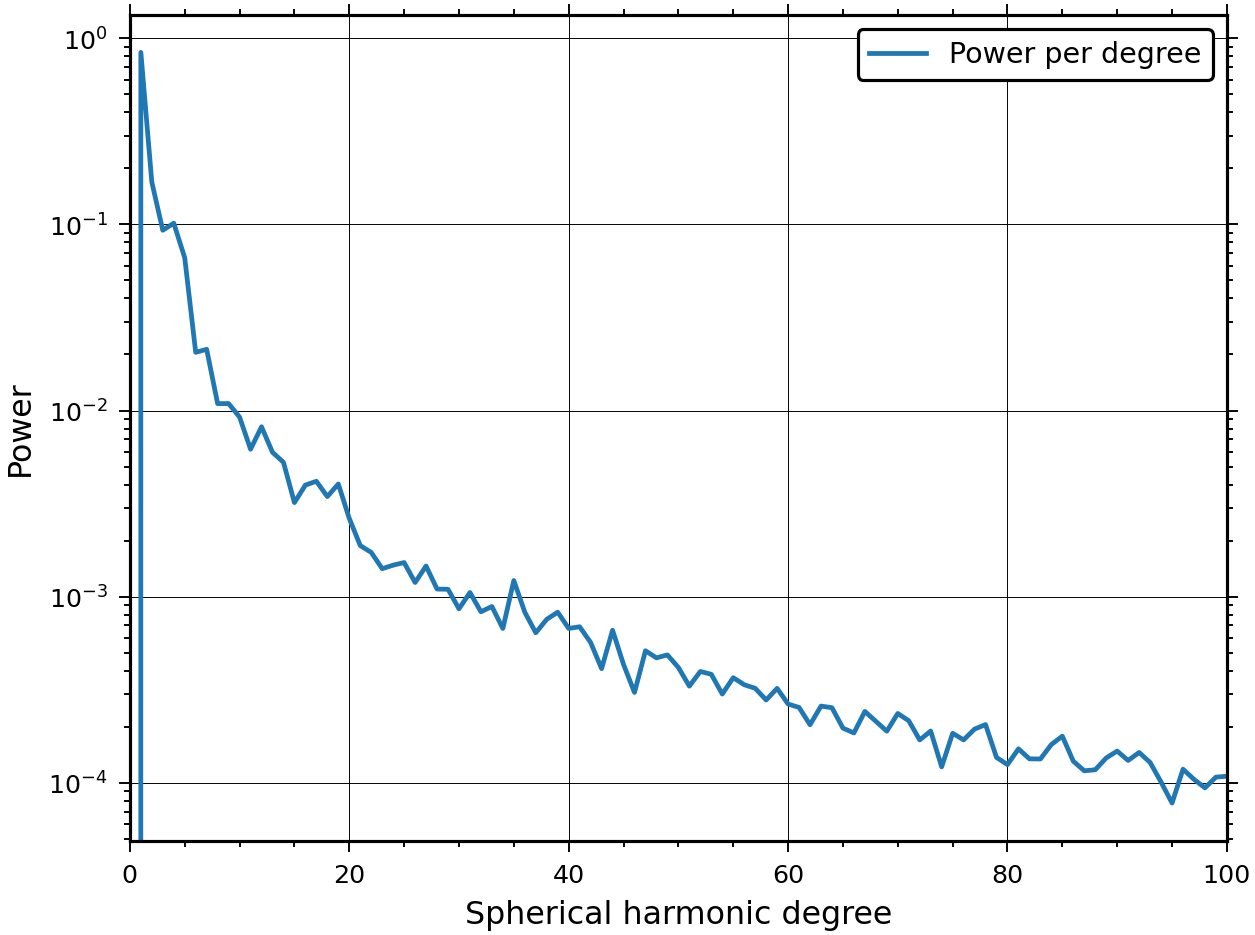

In [9]:
fig, ax = clm.plot_spectrum(show=False)    # show=False is used to avoid a warning when plotting in inline mode

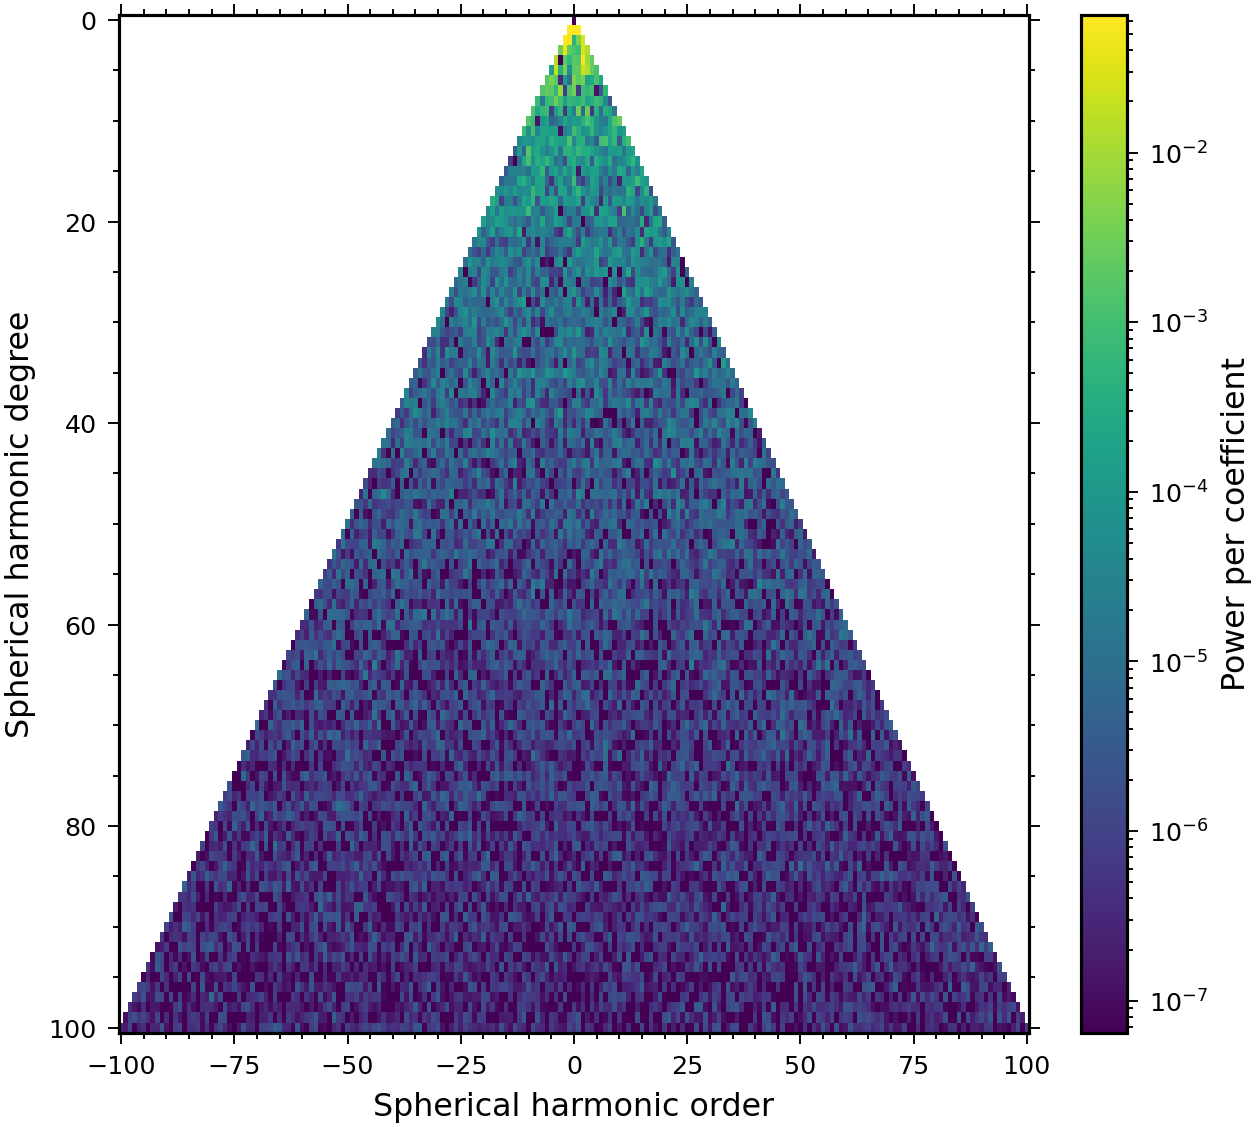

In [10]:
fig, ax = clm.plot_spectrum2d(cmap_rlimits=(1.e-7, 0.1),
                              show=False)

In [11]:
clm_ortho = clm.convert(normalization='ortho',
                        csphase=-1,
                        lmax=50)

In [12]:
print(clm_ortho)


  name = None
  kind = 'real'
  normalization = 'ortho'
  csphase = -1
  lmax = 50
  error_kind = None
  header = None
  header2 = None
  units = None


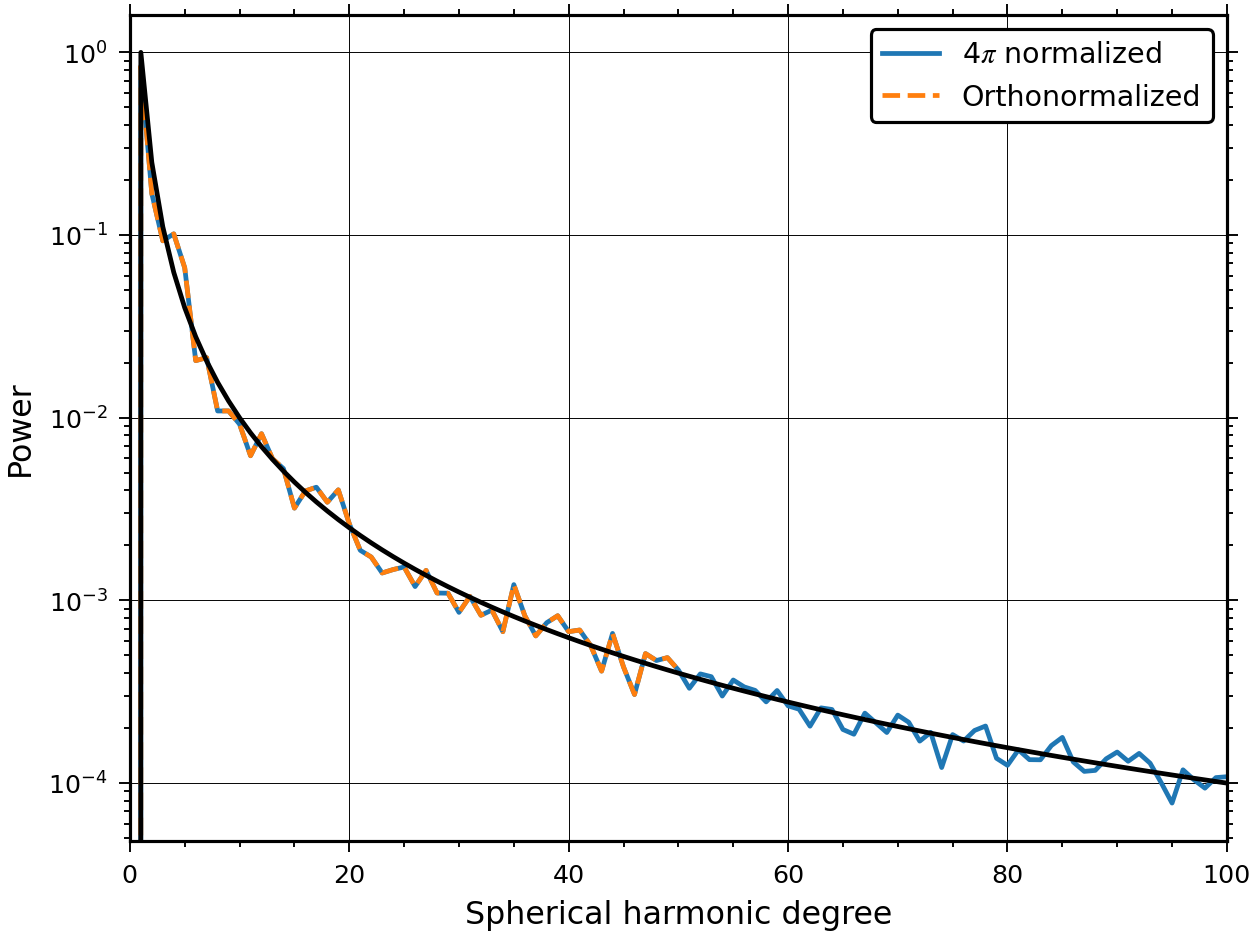

In [13]:
fig, ax = clm.plot_spectrum(legend=r'4$\pi$ normalized',
                            show=False)
clm_ortho.plot_spectrum(ax=ax,
                        legend='Orthonormalized',
                        plot_dict={'linestyle': 'dashed'})
ax.plot(clm.degrees(), power, '-k')
limits = ax.set_xlim(0, 100)

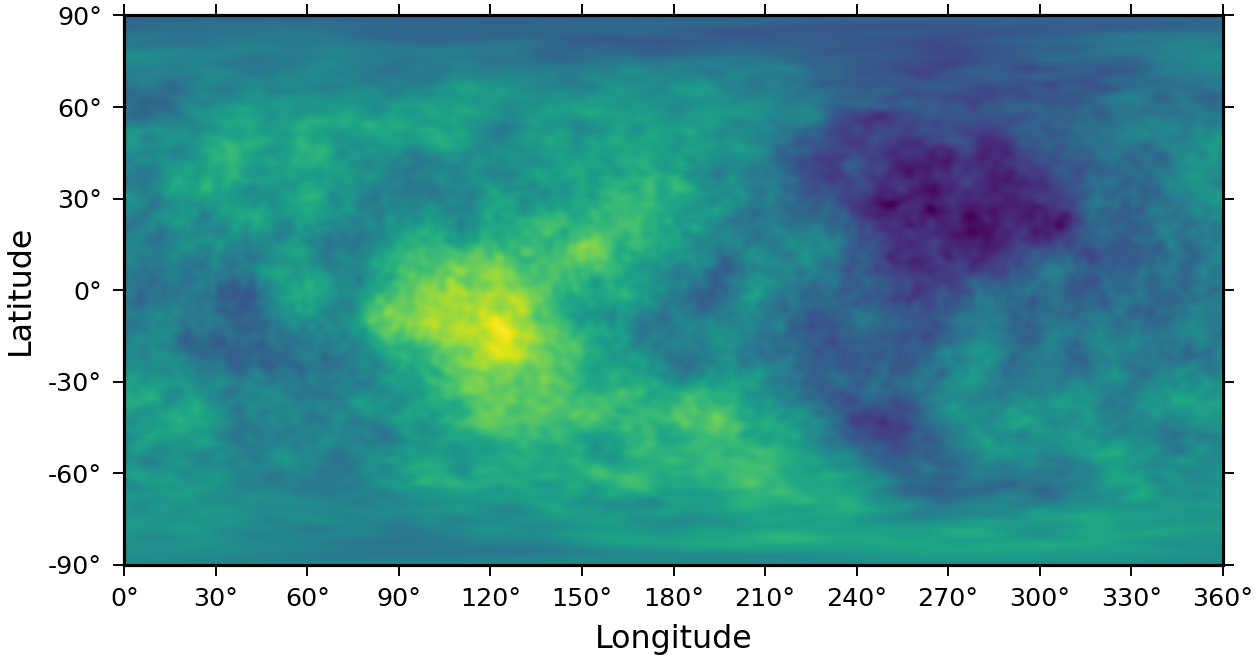

In [14]:
grid = clm.expand()
fig, ax = grid.plot(show=False)

In [15]:
grid

  name = None
  kind = 'real'
  grid = 'DH'
  n = 202
  sampling = 2
  extend = True
  nlat = 203
  nlon = 405
  lmax = 100
  units = None

In [16]:
### tuorial of pysh in https://nbviewer.org/github/SHTOOLS/SHTOOLS/blob/master/examples/notebooks/low-level-spherical-harmonic-analyses.ipynb

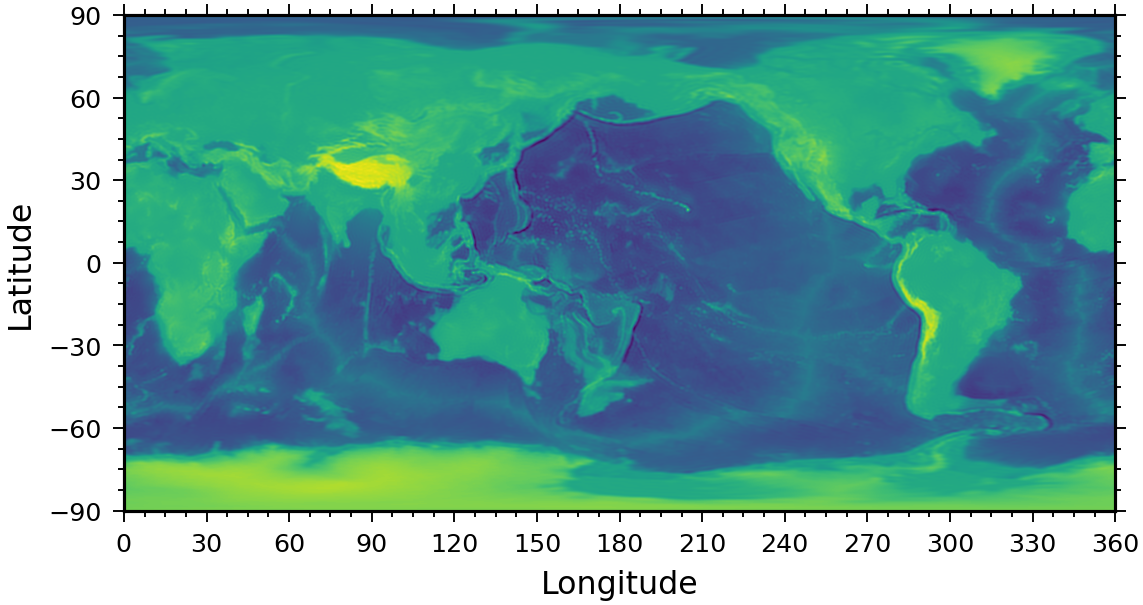

In [7]:
clm = pysh.datasets.Earth.Earth2014.tbi(lmax=300)
topo = pysh.expand.MakeGridDH(clm.coeffs, sampling=2) / 1000.

fig, ax = plt.subplots(1, 1)
ax.imshow(topo, extent=(0, 360, -90, 90))
ax.set(xlabel='Longitude', ylabel='Latitude', yticks=np.arange(-90, 120, 30), xticks=np.arange(0, 390, 30))
ax.minorticks_on()

In [8]:
topo

array([[-4.63067721, -4.63067721, -4.63067721, ..., -4.63067721,
        -4.63067721, -4.63067721],
       [-4.51177475, -4.51133889, -4.51089578, ..., -4.51303674,
        -4.51262387, -4.51220314],
       [-4.25181639, -4.24936956, -4.2469129 , ..., -4.2590902 ,
        -4.25667749, -4.25425262],
       ...,
       [ 2.7148864 ,  2.71570134,  2.71653179, ...,  2.71253495,
         2.71330318,  2.714087  ],
       [ 2.74688389,  2.74727126,  2.74766597, ...,  2.74576602,
         2.74613126,  2.74650389],
       [ 2.79340196,  2.79357365,  2.79374723, ...,  2.79289823,
         2.79306426,  2.79323216]])

In [19]:
coeffs = pysh.expand.SHExpandDH(topo, sampling=2)

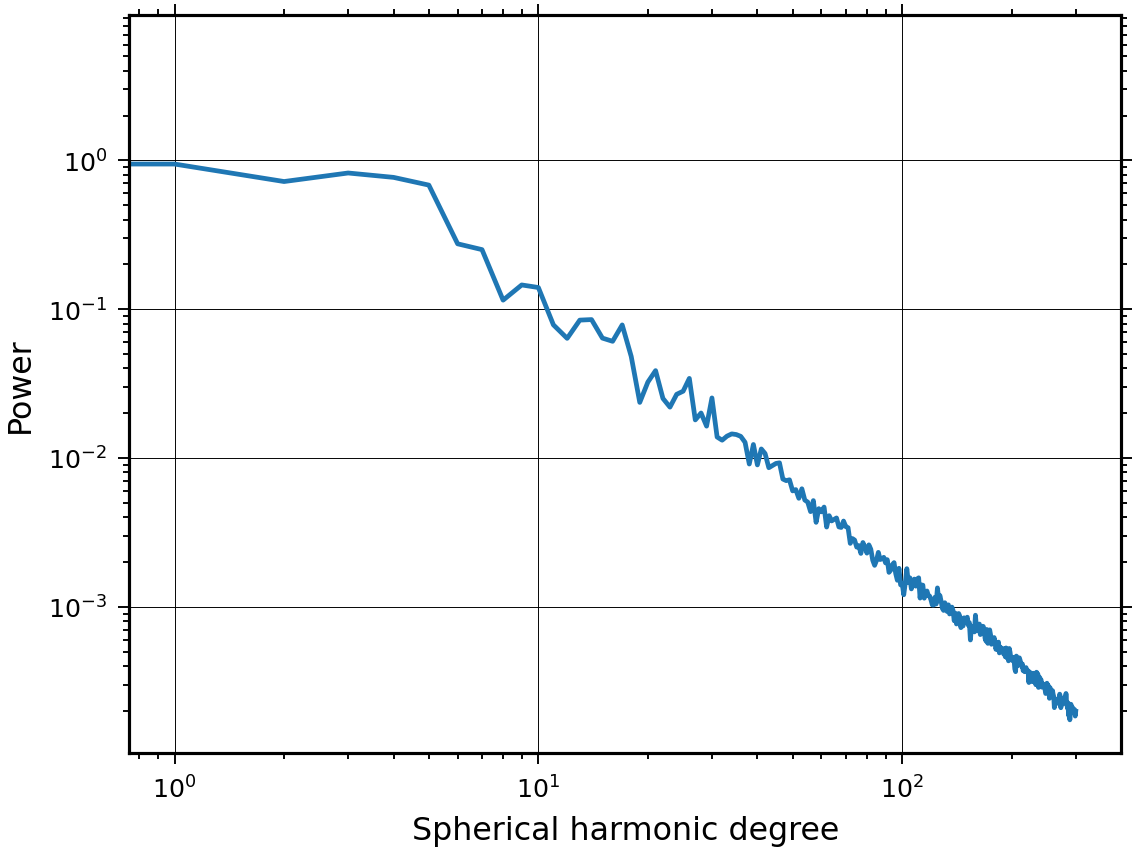

In [20]:
power_per_l = pysh.spectralanalysis.spectrum(coeffs)
degrees = np.arange(coeffs.shape[1])

fig, ax = plt.subplots(1, 1)
ax.plot(degrees, power_per_l)
ax.set(yscale='log', xscale='log', xlabel='Spherical harmonic degree', ylabel='Power')
ax.grid()



In [ ]:
##########################################
###
### test the python code in https://github.com/gioda/FeARLesS/tree/main
###
##########################################

In [1]:
from skimage import measure
import pandas as pd
from skimage.filters import threshold_otsu, rank
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pyshtools as pysh
from skimage.io import imread
from skimage.io import imsave
from skimage import filters
from skimage import morphology
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

In [3]:
import napari
from napari.utils import nbscreenshot

In [4]:
cle.available_device_names()

['Apple M1 Max']

In [5]:
# For 3D processing, powerful graphics
# processing units might be necessary
cle.select_device('TX')

/Users/jingkui.wang/miniforge3/envs/image_env/lib/python3.9/site-packages/pyclesperanto_prototype/_tier0/_device.py:77: UserWarning: No OpenCL device found with TX in their name. Using Apple M1 Max instead.
  warnings.warn(f"No OpenCL device found with {name} in their name. Using {device.name} instead.")


<Apple M1 Max on Platform: Apple (2 refs)>

In [6]:
### import function https://github.com/gioda/FeARLesS/blob/main/Fearless/utils.py
import pyshtools
import gc
import numpy as np
import os
from vedo import printc, spher2cart, probePoints
#from vedo import Points
import shutil
from sys import exit

In [7]:
from vedo import spher2cart
from vedo import printc, spher2cart, probePoints

In [8]:
def samplePoints(vol, expo, N, radiusDiscretisation):
    """Compute sample points."""
    pos = vol.center()
    rmax = vol.diagonalSize()/2

    samplePoints = []
    for th in np.linspace(0, np.pi, N, endpoint=False):
        for ph in np.linspace(0, 2*np.pi, N, endpoint=False):

            # compute sample points
            p = spher2cart(rmax, th, ph)
            # making discretization more dense away from the center
            p_tmp = p / (radiusDiscretisation-1)**expo
            for j in range(radiusDiscretisation):
                SP = pos + p_tmp * (j**expo)
                samplePoints.append(SP)

    del vol
    return np.array(samplePoints)

In [9]:
def confirm(message):
    """
    Ask user to enter Y or N (case-insensitive).

    :return: True if the answer is Y.
    :rtype: bool
    """
    answer = ""
    while answer not in ["y", "n"]:
        answer = input(message).lower()
    return answer == "y"


def pathExists(path):
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
        printc("Directory ", path, " Created ", c='green')
    else:
        printc("Directory ", path, " already exists", c='red')
        if confirm("Should I delete the folder and create a new one [Y/N]? "):
            shutil.rmtree(path)
            os.makedirs(path, exist_ok=True)
            printc("Directory ", path, " Created ", c='green')
        else:
            exit()


def voxelIntensity(vol, expo, N, radiusDiscretisation):
    """Compute voxel intensities."""
    pos = vol.center()
    rmax = vol.diagonalSize()/2

    scalars = []

    for th in np.linspace(0, np.pi, N, endpoint=False):
        for ph in np.linspace(0, 2*np.pi, N, endpoint=False):

            # compute sample points
            p = spher2cart(rmax, th, ph)
            samplePointsTmp = []
            # making discretization more dense away from the center
            p_tmp = p / (radiusDiscretisation-1)**expo
            for j in range(radiusDiscretisation):
                SP = pos + p_tmp * (j**expo)
                samplePointsTmp.append(SP)

            # compute intensities
            pb = probePoints(vol, samplePointsTmp)

            del samplePointsTmp

            # making the intensities growing outside the volume according to the gradient
            scalarsTmp = pb.getPointArray()
            nonz = np.nonzero(scalarsTmp)[0]
            if len(nonz) > 2:
                lastNoZeroId = nonz[-1]  # find the last value != 0
                secondlastNoZeroId = nonz[-2]
                # find the last value != 0
                lastNoZero = scalarsTmp[lastNoZeroId]
                secondlastNoZero = scalarsTmp[secondlastNoZeroId]
                dx = lastNoZero - secondlastNoZero

            for i in range(lastNoZeroId+1, len(scalarsTmp)):
                scalarsTmp[i] = scalarsTmp[i-1] + dx
            scalars.append(scalarsTmp.tolist())

            del pb, scalarsTmp

    del vol
    gc.collect()

    # return allIntensitiesMatrix
    return np.array(scalars).reshape((N * N, radiusDiscretisation))


def forwardTransformation(matrixOfIntensities, N, lmax):

    ##############################################

    coeff = matrixOfIntensities

    ##############################################
    # SPHARNM
    allClm = np.zeros((matrixOfIntensities.shape[1], 2, lmax, lmax))
    for j in range(allClm.shape[0]):
        formattedcoeff = np.reshape(coeff[:, j], (N, N))
        SH = pyshtools.SHGrid.from_array(formattedcoeff)
        clm = SH.expand()

        allClm[j, :, :, :] = clm.to_array(lmax=lmax - 1)

    del formattedcoeff, clm, matrixOfIntensities

    return allClm


def inverseTransformations(allClm, allIntensitiesShape, N, lmax):
    """Make inverse SPHARM."""
    from scipy.interpolate import griddata

    aSH_recoMatrix = np.zeros((allIntensitiesShape[0], allIntensitiesShape[1]))

    for j in range(allClm.shape[0]):
        # inverse SPHARM coefficients
        clmCoeffs = pyshtools.SHCoeffs.from_array(allClm[j, :, :, :])
        SH_reco = clmCoeffs.expand(lmax=lmax - 1)
        # grid_reco.plot()
        aSH_reco = SH_reco.to_array()

        ##############################
        pts1 = []
        ll = []
        for ii, long in enumerate(np.linspace(0, 360, num=aSH_reco.shape[1], endpoint=True)):
            for jj, lat in enumerate(np.linspace(90, -90, num=aSH_reco.shape[0], endpoint=True)):
                th = np.deg2rad(90 - lat)
                ph = np.deg2rad(long)
                p = spher2cart(aSH_reco[jj][ii], th, ph)
                pts1.append(p)
                ll.append((lat, long))

        radii = aSH_reco.T.ravel()

        # make a finer grid
        n = N * 1j
        l_min, l_max = np.array(ll).min(axis=0), np.array(ll).max(axis=0)
        grid = np.mgrid[l_max[0]:l_min[0]:n, l_min[1]:l_max[1]:n]
        grid_x, grid_y = grid
        agrid_reco_finer = griddata(ll, radii, (grid_x, grid_y), method='cubic')
        ##############################

        formatted_aSH_reco = np.reshape(agrid_reco_finer, (N * N))

        aSH_recoMatrix[:, j] = formatted_aSH_reco

    del formatted_aSH_reco, agrid_reco_finer, grid_x, grid_y, grid

    return aSH_recoMatrix




In [12]:
from vedo import printc, load, ProgressBar
#from utils import pathExists, voxelIntensity
import numpy as np


In [13]:
radiusDiscretisation = 50
N = 250
FFTexpansion = radiusDiscretisation
expo = 1.0

In [14]:
input_path = '/Users/jingkui.wang/workspace/imp/image_analysis/S-BIAD441/hearts/'
output_path = "/Users/jingkui.wang/workspace/imp/image_analysis/S-BIAD441/hearts/output/reconstructed_shapes/"
intensity_path = "/Users/jingkui.wang/workspace/imp/image_analysis/S-BIAD441/hearts/output/voxel_intensities/"
os.makedirs(output_path, exist_ok=True)
os.makedirs(intensity_path, exist_ok=True)


In [15]:
volume_files = [f for f in os.listdir(input_path) if f.endswith('.vti')]

In [16]:
len(volume_files)

27

In [17]:
vol_file = os.path.join(input_path, volume_files[20])
vol = load(vol_file)
vol

<Volume(0x12ad8fc00) at 0x1079ce580>

In [18]:
allIntensities = voxelIntensity(vol, expo, N, radiusDiscretisation)

In [19]:
allIntensities

array([[    8.        ,     0.        ,     0.        , ...,
         -942.88598633,  -982.71679688, -1022.54760742],
       [    8.        ,     0.        ,     0.        , ...,
         -942.88598633,  -982.71679688, -1022.54760742],
       [    8.        ,     0.        ,     0.        , ...,
         -942.88598633,  -982.71679688, -1022.54760742],
       ...,
       [    8.        ,    37.61311722,    60.05978775, ...,
        -1620.5925293 , -1671.89904785, -1723.20556641],
       [    8.        ,    37.61070251,    60.04518127, ...,
        -1622.14025879, -1673.49597168, -1724.85168457],
       [    8.        ,    37.60847092,    60.03143692, ...,
        -1623.55383301, -1674.95446777, -1726.35510254]])

In [20]:
allIntensities.shape

(62500, 50)

In [ ]:
DataPath = '../data/Limbs_Flank/'
path_results = 'res/' \
    'allIntensities-sampleSize100-' + \
    'radiusDiscretisation-' + \
    str(radiusDiscretisation) + '-N-' + str(N) + '/'


pathExists(path_results)


limbs = [2490, 2500, 2510, 2540, 2570, 2571, 2573, 2574, 2590, 2600, 2601, 2610, 2620, 2631, 2640, 2642, 2650, 2651, 2652, 2653, 2654, 2655, 2660,
         2662, 2663, 2671, 2681, 2682, 2690, 2700, 2701, 2703, 2704, 2710, 2711, 2712, 2714, 2720, 2721, 2722, 2731, 2732, 2740, 2741, 2742, 2745,
         2746, 2750, 2751, 2752, 2754, 2755, 2760, 2761, 2762, 2771, 2772, 2780, 2790, 2831, 2840, 2850, 2870, 2880, 2881, 2882, 2890, 2901, 2902]
t = [249, 250, 251, 254, 257, 257, 257, 257, 259, 260, 260, 261, 262, 263, 264, 264, 265, 265, 265, 265, 265, 265, 266, 266, 266, 267,
     268, 268, 269, 270, 270, 270, 270, 271, 271, 271, 271, 272, 272, 272, 273, 273, 274, 274, 274, 274, 274, 275, 275, 275, 275, 275, 276, 276, 276,
     277, 277, 278, 279, 283, 284, 285, 287, 288, 288, 288, 289, 290, 290]

Treal = np.arange(t[0], t[-1]+1, dtype=int)
newTotLimbs = len(Treal)

totlimbs = len(limbs)
print(totlimbs, 'limbs!! \n')


pb = ProgressBar(0, totlimbs, c=5)
for j in pb.range():

    ##############################################
    # loading files
    vol = load(DataPath + 'ReferenceShape_' +
               str(limbs[j])[0:-1] + '_' + str(limbs[j])[-1] + '.vti')

    ##############################################
    # computing voxel intensities
    allIntensities = voxelIntensity(vol, expo, N, radiusDiscretisation)

    name = 'allIntensities_' + 'ReferenceShape_' + \
        str(limbs[j])[0:-1] + '_' + str(limbs[j])[-1]
    np.save(path_results + name, allIntensities)
    printc('allIntensities', name, 'saved!', c='g')

    allIntensitiesShape = allIntensities.shape
    np.save(path_results + 'allIntensitiesShape', allIntensitiesShape)

    pb.print()

In [31]:
## run the script from https://github.com/gioda/FeARLesS/blob/main/Fearless/pureSPharm.py
from sys import argv, exit
from scipy.interpolate import griddata
import numpy as np

from vedo import printc, load, spher2cart, mag, ProgressBar, Points, write
from vedo import recoSurface
from vedo import *
#from utils import pathExists

import pyshtools
#############################################################

In [11]:
def computeCLM(mesh, rmax, N, x0):
    """Compute CLM."""
    # cast rays from the center and find intersections
    agrid, pts = [], []
    for th in np.linspace(0, np.pi, N, endpoint=False):
        lats = []
        for ph in np.linspace(0, 2*np.pi, N, endpoint=False):
            p = spher2cart(rmax, th, ph)
            intersections = mesh.intersectWithLine(x0, x0 + p)
            if len(intersections):
                value = mag(intersections[0]-x0)
                lats.append(value)
                pts.append(intersections[0])
            else:
                lats.append(rmax)
                # lats.append(0)
                pts.append(p)
        agrid.append(lats)
    agrid = np.array(agrid)
    
    grid = pyshtools.SHGrid.from_array(agrid)
    clm = grid.expand()
    # grid_reco = clm.expand(lmax=lmax)  # cut "high frequency" components

    return clm

In [12]:
lmax = 20
N = 500          # number of grid intervals on the unit sphere
rmax = 1400
x0 = [0, 0, 0]  # set object at this position
xLimb = [-200, 0, 200]
cutOrigin = [150, 0, 0]
deg_fit = 6

In [13]:
DataPath = '/Users/jingkui.wang/workspace/imp/image_analysis/S-BIAD441/limbs/limbs-noFlank/'
path_results = 'res/' \
    'pure_spharm' + '-lmax' + str(lmax) + '-N' + \
    str(N) + '-deg_fit' + str(deg_fit) + '/'


pathExists(path_results)

printc('lmax =', lmax, 'N =', N, 'deg_fit =', deg_fit, c='y')


Directory  res/pure_spharm-lmax20-N500-deg_fit6/  already exists


Should I delete the folder and create a new one [Y/N]?  Y


Directory  res/pure_spharm-lmax20-N500-deg_fit6/  Created 
lmax = 20 N = 500 deg_fit = 6


In [14]:
DataPath

'/Users/jingkui.wang/workspace/imp/image_analysis/S-BIAD441/limbs/limbs-noFlank/'

In [15]:
printc("loading limbs ...", c='y')
limbs = load(DataPath + '*.vtk')

totLimbs = len(limbs)

printc('tot # limbs --> ', totLimbs, c='y')

loading limbs ...
tot # limbs -->  69


In [16]:
len(limbs)
limbs[58].filename

'/Users/jingkui.wang/workspace/imp/image_analysis/S-BIAD441/limbs/limbs-noFlank/Limb_279.vtk'

In [17]:
################################
# finding time from limbs' file names
Tall = []
for j in range(totLimbs):
    filename = limbs[j].filename.split('/')[-1].split('.')[0]
    if '_' in filename:
        number_part = filename.split('_')[1]
    else:
        number_part = filename.split('.')[0]
    try:
        Tall.append(float(number_part))
    except ValueError:
        print(f"Could not extract a valid number from filename: {filename}")
        continue

Tall = np.array(Tall)
printc('Tall \n', Tall, c='y')

Treal = np.arange(Tall[0], Tall[-1]+1, dtype=int)

NumRecLimbs = len(Treal)


Tall 
 [249. 250. 251. 254. 257. 257. 257. 257. 259. 260. 260. 261. 262. 263.
 264. 264. 265. 265. 265. 265. 265. 265. 266. 266. 266. 267. 268. 268.
 269. 270. 270. 270. 270. 271. 271. 271. 271. 272. 272. 272. 273. 273.
 274. 274. 274. 274. 274. 275. 275. 275. 275. 275. 276. 276. 276. 277.
 277. 278. 279. 283. 284. 285. 287. 288. 288. 288. 289. 290. 290.]


In [18]:
Tall

array([249., 250., 251., 254., 257., 257., 257., 257., 259., 260., 260.,
       261., 262., 263., 264., 264., 265., 265., 265., 265., 265., 265.,
       266., 266., 266., 267., 268., 268., 269., 270., 270., 270., 270.,
       271., 271., 271., 271., 272., 272., 272., 273., 273., 274., 274.,
       274., 274., 274., 275., 275., 275., 275., 275., 276., 276., 276.,
       277., 277., 278., 279., 283., 284., 285., 287., 288., 288., 288.,
       289., 290., 290.])

In [19]:
totLimbs
limbs;

In [20]:
Mclm = []
pb = ProgressBar(0, totLimbs, c=2)
print(pb)

In [21]:
for j in pb.range():
    Mtmp = []
    clmAllTmp = []
    #
    filename = limbs[j].filename.split('/')[-1].split('.')[0]
    if '_' in filename:
        try:
            number_part = filename.split('_')[1]
        except IndexError:
            print(f"Unexpected filename format with underscore: {filename}")
            continue
    else:
        number_part = filename.split('.')[0]

    try:
        Mtmp.append(float(number_part))
    except ValueError:
        print(f"Could not extract a valid number from filename: {filename}")
        continue
    #

    clmTmp = computeCLM(limbs[j].pos(xLimb), rmax, N, x0)

    clmAllTmp.append(clmTmp.to_array())
    Mtmp.append(np.asarray(clmAllTmp))

    Mclm.append(Mtmp)

    pb.print('clm...')


 ─────────────────────── 1% clm... ────────────────────── 3%     ETA: 11m57s (0.1 it/s) clm... ────────────────────── 4%                             ETA: 11m47s (0.1 it/s) clm... ────────────────────── 6%                             ETA: 11m43s (0.1 it/s) clm... ━───────────────────── 7%                             ETA: 12m1s (0.1 it/s) clm... ━───────────────────── 9%                           ETA: 13m53s (0.1 it/s) clm... ━───────────────────── 10%                             ETA: 14m2s (0.1 it/s) clm... ━━──────────────────── 12%                           ETA: 13m45s (0.1 it/s) clm... ━━──────────────────── 13%                             ETA: 13m55s (0.1 it/s) clm... ━━──────────────────── 14%                             ETA: 14m8s (0.1 it/s) clm... ━━━─────────────────── 16%                           ETA: 14m14s (0.1 it/s) clm... ━━━─────────────────── 17%                             ETA: 14m21s (0.1 it/s) clm... ━━━─────────────────── 19%                             ETA: 14m21s (

In [22]:
pb.range();
totLimbs

69

In [23]:
CLM = sorted(Mclm, key=lambda tup: tup[0])

CLMtot = []
for j in range(len(CLM)):
    CLMtot.append(CLM[j][1])


In [24]:
CLMtot = np.asarray(CLMtot)
CLMtot = np.squeeze(CLMtot, axis=1)

filename = 'clm_N' + str(N) + '_lmax'+str(lmax) + '.npy'
printc('saving --> ', filename, c='g')
np.save(path_results + filename, CLMtot)


saving -->  clm_N500_lmax20.npy


In [25]:
# CLMtot = np.load(path_results + 'clm_N500_lmax50.npy')

clmSpline = np.zeros(
    shape=(NumRecLimbs, CLMtot.shape[1], CLMtot.shape[2], CLMtot.shape[3]))
print('clmSpline.shape', clmSpline.shape)


clmSpline.shape (42, 2, 250, 250)


In [26]:
maxt = np.max(Treal)
mint = np.min(Treal)
xnew = np.linspace(mint, maxt, NumRecLimbs)
range_m = np.linspace(
    0, NumRecLimbs, num=clmSpline.shape[0], endpoint=False).astype(int)


In [27]:
pb = ProgressBar(0, CLMtot.shape[1], c=2)
for ll in pb.range():
    for k in range(CLMtot.shape[2]):
        for j in range(CLMtot.shape[3]):

            spl = np.poly1d(np.polyfit(
                np.array(Tall), np.array(CLMtot[:,  ll, k, j]), deg_fit))
            ynew = spl(xnew)

            for m in range(clmSpline.shape[0]):
                clmSpline[m, ll, k, j] = ynew[range_m[m]]

    pb.print('splines...')

 ━━━━━━━━━━━─────────── 50% splines... ━━━━━━━━━━━━━━━━━━━━━━         elapsed: 6s (0.3 it/s)        


In [28]:
pb = ProgressBar(0, clmSpline.shape[0], c=2)

In [29]:
#from vedo import reconstruct_surface

In [36]:
for t in pb.range():

    clmCoeffs = pyshtools.SHCoeffs.from_array(clmSpline[t])

    grid_reco = clmCoeffs.expand(lmax=lmax)
    # grid_reco.plot()

    ##############################################
    agrid_reco = grid_reco.to_array()

    ll = []
    for i, long in enumerate(np.linspace(0, 360, num=agrid_reco.shape[1], endpoint=True)):
        for j, lat in enumerate(np.linspace(90, -90, num=agrid_reco.shape[0], endpoint=True)):
            th = np.deg2rad(90 - lat)
            ph = np.deg2rad(long)
            p = spher2cart(agrid_reco[j][i], th, ph)
            ll.append((lat, long))

    radii = agrid_reco.T.ravel()
    n = 2*N * 1j
    lnmin, lnmax = np.array(ll).min(axis=0), np.array(ll).max(axis=0)
    grid = np.mgrid[lnmax[0]:lnmin[0]:n, lnmin[1]:lnmax[1]:n]
    grid_x, grid_y = grid
    agrid_reco_finer = griddata(ll, radii, (grid_x, grid_y), method='cubic')

    pts2 = []
    for i, long in enumerate(np.linspace(0, 360, num=agrid_reco_finer.shape[1], endpoint=False)):
        for j, lat in enumerate(np.linspace(90, -90, num=agrid_reco_finer.shape[0], endpoint=True)):
            th = np.deg2rad(90 - lat)
            ph = np.deg2rad(long)
            p = spher2cart(agrid_reco_finer[j][i], th, ph)
            pts2.append(p)

    #mesh2 = Points(pts2, r=20, c="r", alpha=1)
    
    mesh2 = Points(pts2, r=20, c="r", alpha=1)
    
    mesh2.clean(0.005)
    surfTmp = recoSurface(mesh2.cutWithPlane(origin=[-30, 0, 0]),
                          dims=100
                          )
    #surfTmp = reconstruct_surface(mesh2.cutWithPlane(origin=[-30, 0, 0]),
    #                      dims=100
    #                      )
    
    #mesh2.clean()
    #surfTmp = Points.reconstruct_surface(mesh2.cut_with_plane(origin=[-30, 0, 0]),
    #                      dims=100
    #                      )

    surf = surfTmp.extractLargestRegion().clone()
    surf.smooth()

    # #Reconstruction
    write(mesh2, path_results + 'Points_Limb-rec_' +
          str(Treal[t]) + '.vtk', binary=False)
    write(surf, path_results + 'Limb-rec_' +
          str(Treal[t]) + '.vtk', binary=False)

    pb.print('rec ...')

 ─────────────────────── 2% rec ... ────────────────────── 5%       ETA: 147m20s (0.0 it/s) rec ... ━───────────────────── 7%                               ETA: 97m21s (0.0 it/s) rec ... ━───────────────────── 10%                             ETA: 72m16s (0.0 it/s) rec ... ━━──────────────────── 12%                             ETA: 57m11s (0.0 it/s) rec ... ━━──────────────────── 14%                             ETA: 47m6s (0.0 it/s) rec ... ━━━─────────────────── 17%                             ETA: 39m53s (0.0 it/s) rec ... ━━━─────────────────── 19%                             ETA: 34m28s (0.0 it/s) rec ... ━━━━────────────────── 21%                             ETA: 30m15s (0.0 it/s) rec ... ━━━━━───────────────── 24%                             ETA: 26m51s (0.0 it/s) rec ... ━━━━━───────────────── 26%                             ETA: 24m4s (0.0 it/s) rec ... ━━━━━━──────────────── 29%                             ETA: 21m44s (0.0 it/s) rec ... ━━━━━━──────────────── 31%               